#1.Use feature-extraction to train a transfer learning model on 10% of the Food Vision data for 10 epochs using tf.keras.applications.EfficientNetB0 as the base model. Use the ModelCheckpoint callback to save the weights to file.

## Download the data

In [2]:
import zipfile

#Get 10% of training data
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

#Unzip the downloaded file
zip_ref = zipfile.ZipFile("10_food_classes_10_percent.zip")
zip_ref.extractall()
zip_ref.close()

--2023-01-30 20:18:27--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.127.128, 142.250.145.128, 2a00:1450:4013:c16::80, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.127.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M  41.1MB/s    in 4.5s    

2023-01-30 20:18:32 (35.7 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [3]:
#How many images in each folder
import os

#walk through 10 percent data directory and list number of files
for dirpath,dirnames,filename in os.walk("10_food_classes_10_percent"):
  print(f"There are {len(dirnames)} directories and {len(filename)} images in '{dirpath}'.")

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/train'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/ramen'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/steak'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/fried_rice'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/chicken_wings'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/chicken_curry'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/pizza'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/sushi'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/ice_cream'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/grilled_salmon'.
There are 0 directories and 75 images in '10_food_classes_10_percent/tra

In [4]:
#Create training and test directory paths
train_dir="10_food_classes_10_percent/train/"
test_dir="10_food_classes_10_percent/test/"

In [20]:
import tensorflow as tf
IMG_SIZE=(224,224)
BATCH_SIZE=32
train_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir,
                                                                            image_size=IMG_SIZE,
                                                                            label_mode="categorical",
                                                                            batch_size=BATCH_SIZE)

test_data = tf.keras.preprocessing.image_dataset_from_directory(directory = test_dir,
                                                                            image_size=IMG_SIZE,
                                                                            label_mode="categorical",
                                                                            batch_size=BATCH_SIZE)

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [6]:
#Check out the class names of our dataset
train_data_10_percent.class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

##setting up callbacks

In [7]:
#Create TensorBoard callback(functionized because we need to create a new one for eachmodel)
import datetime
import tensorflow as tf

def create_tensorboard_callback(dir_name,experiment_name):
  log_dir = dir_name + "/" + experiment_name + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
  tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir)
  print(f'Saving Tensorboard log files to :{log_dir}')
  return tensorboard_callback

## Model_0: Base model using feature extraction

In [21]:
# create the base model with tf.keras.applications
base_model = tf.keras.applications.EfficientNetB0(include_top=False)

#Freeze base model
base_model.trainable = False

16705208/16705208 [==============================] - 1s 0us/step


In [23]:
#3. create inputs
inputs = tf.keras.layers.Input(shape=(224,224,3), name ="input_layer")

since we are using efficientnet rescaling need not be done

In [24]:
#4. Pass the inputs to base model
x = base_model(inputs)
print(f"Shape after passing inputs through base model : {x.shape}")

Shape after passing inputs through base model : (None, 7, 7, 1280)


In [25]:
#5. Average pool the outputs of the base model
x = tf.keras.layers.GlobalAveragePooling2D(name = "global_average_pooling_layer")(x)
print(f"Shape after GlobalAveragePooling2D: {x.shape}")

Shape after GlobalAveragePooling2D: (None, 1280)


In [26]:
#6. create the output activation layer
outputs = tf.keras.layers.Dense(10,activation="softmax",name="output_layer")(x)

In [27]:
#7.combine the input and output into a model
model_0 = tf.keras.Model(inputs,outputs)

In [30]:
#8.compile for the model
model_0.compile(loss = "categorical_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

#9. Fit the model
history_0 = model_0.fit(train_data_10_percent,
                        epochs = 10,
                        steps_per_epoch = len(train_data_10_percent),
                        validation_data = test_data,
                        validation_steps = int(0.25 * len(test_data)),
                        callbacks = [create_tensorboard_callback(dir_name="transfer_learning",
                                                                 experiment_name="10_percent_feature_extraction")])

Saving Tensorboard log files to :transfer_learning/10_percent_feature_extraction/20230130-204045
Epoch 1/10
24/24 [==============================] - 11s 240ms/step - loss: 0.4863 - accuracy: 0.8800 - val_loss: 0.4865 - val_accuracy: 0.8668
Epoch 2/10
24/24 [==============================] - 4s 151ms/step - loss: 0.4034 - accuracy: 0.9133 - val_loss: 0.4524 - val_accuracy: 0.8651
Epoch 3/10
24/24 [==============================] - 5s 183ms/step - loss: 0.3401 - accuracy: 0.9373 - val_loss: 0.4632 - val_accuracy: 0.8618
Epoch 4/10
24/24 [==============================] - 5s 182ms/step - loss: 0.2981 - accuracy: 0.9427 - val_loss: 0.4206 - val_accuracy: 0.8766
Epoch 5/10
24/24 [==============================] - 5s 183ms/step - loss: 0.2726 - accuracy: 0.9560 - val_loss: 0.4439 - val_accuracy: 0.8684
Epoch 6/10
24/24 [==============================] - 5s 183ms/step - loss: 0.2540 - accuracy: 0.9507 - val_loss: 0.4127 - val_accuracy: 0.8832
Epoch 7/10
24/24 [==============================] 

In [31]:
#Evaluate on full test data
model_0.evaluate(test_data)

79/79 [==============================] - 6s 70ms/step - loss: 0.3808 - accuracy: 0.8840


[0.3807802200317383, 0.8840000033378601]

#2.Fine-tune the last 20 layers of the base model you trained in 2 for another 10 epochs.

In [32]:
#Check the layers in base model
for layer_number,layer in enumerate(base_model.layers):
  print(layer_number,layer.name)

0 input_1
1 rescaling
2 normalization
3 tf.math.truediv
4 stem_conv_pad
5 stem_conv
6 stem_bn
7 stem_activation
8 block1a_dwconv
9 block1a_bn
10 block1a_activation
11 block1a_se_squeeze
12 block1a_se_reshape
13 block1a_se_reduce
14 block1a_se_expand
15 block1a_se_excite
16 block1a_project_conv
17 block1a_project_bn
18 block2a_expand_conv
19 block2a_expand_bn
20 block2a_expand_activation
21 block2a_dwconv_pad
22 block2a_dwconv
23 block2a_bn
24 block2a_activation
25 block2a_se_squeeze
26 block2a_se_reshape
27 block2a_se_reduce
28 block2a_se_expand
29 block2a_se_excite
30 block2a_project_conv
31 block2a_project_bn
32 block2b_expand_conv
33 block2b_expand_bn
34 block2b_expand_activation
35 block2b_dwconv
36 block2b_bn
37 block2b_activation
38 block2b_se_squeeze
39 block2b_se_reshape
40 block2b_se_reduce
41 block2b_se_expand
42 block2b_se_excite
43 block2b_project_conv
44 block2b_project_bn
45 block2b_drop
46 block2b_add
47 block3a_expand_conv
48 block3a_expand_bn
49 block3a_expand_activati

In [34]:
#Summary of base model
model_0.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling_laye  (None, 1280)             0         
 r (GlobalAveragePooling2D)                                      
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4,062,381
Trainable params: 12,810
Non-trainable params: 4,049,571
_________________________________________________________________


In [35]:
# setting last 20 layers of our base_model.trainable = True
base_model.trainable = True

In [36]:
#freeze all layers except for the last 20
for layers in base_model.layers[:-20]:
  layers.trainable = False

In [37]:
model_0.compile(loss="categorical_crossentropy",
                optimizer = tf.keras.optimizers.Adam(lr = 0.0001),#when fine tuning, we need to lower lr to 10x(best practise)
                metrics=["Accuracy"])

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [38]:
# check how many trainable variables
print(len(model_0.trainable_variables))

21


In [42]:
# fine tune for another 5 epochs
initial_epochs=10
fine_tune_epochs = initial_epochs + 10

#refit the model(same as model_2 except more trainable layers)
history_fine_10_percent = model_0.fit(train_data_10_percent,
                                      epochs = fine_tune_epochs,
                                      steps_per_epoch = len(train_data_10_percent),
                                      validation_data = test_data,
                                      validation_steps = int(0.25 * len(test_data)),
                                      initial_epoch = history_0.epoch[-1],#starting from last epoch where model_2 left
                                      callbacks = [create_tensorboard_callback(dir_name="transfer_learning",
                                                                              experiment_name = "10_percent_fine_tune_last_20")])

Saving Tensorboard log files to :transfer_learning/10_percent_fine_tune_last_20/20230130-204937
Epoch 10/20
24/24 [==============================] - 6s 252ms/step - loss: 0.5672 - Accuracy: 0.8693 - val_loss: 0.4035 - val_Accuracy: 0.8701
Epoch 11/20
24/24 [==============================] - 4s 158ms/step - loss: 0.3306 - Accuracy: 0.9547 - val_loss: 0.3804 - val_Accuracy: 0.8832
Epoch 12/20
24/24 [==============================] - 4s 156ms/step - loss: 0.2484 - Accuracy: 0.9627 - val_loss: 0.4118 - val_Accuracy: 0.8684
Epoch 13/20
24/24 [==============================] - 5s 189ms/step - loss: 0.1809 - Accuracy: 0.9840 - val_loss: 0.3760 - val_Accuracy: 0.8783
Epoch 14/20
24/24 [==============================] - 5s 189ms/step - loss: 0.1443 - Accuracy: 0.9853 - val_loss: 0.3838 - val_Accuracy: 0.8717
Epoch 15/20
24/24 [==============================] - 5s 189ms/step - loss: 0.1155 - Accuracy: 0.9893 - val_loss: 0.3542 - val_Accuracy: 0.8832
Epoch 16/20
24/24 [===========================

In [43]:
#evaluate on test data
model_0.evaluate(test_data)

79/79 [==============================] - 6s 72ms/step - loss: 0.3513 - Accuracy: 0.8888


[0.3513335585594177, 0.8888000249862671]

#3.Fine-tune the last 30 layers of the base model you trained in 2 for another 10 epochs.

In [44]:
# setting last 30 layers of our base_model.trainable = True
base_model.trainable = True

In [45]:
#freeze all layers except for the last 30
for layers in base_model.layers[:-30]:
  layers.trainable = False

In [46]:
model_0.compile(loss="categorical_crossentropy",
                optimizer = tf.keras.optimizers.Adam(lr = 0.0001),#when fine tuning, we need to lower lr to 10x(best practise)
                metrics=["Accuracy"])

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [47]:
# fine tune for another 5 epochs
initial_epochs=10
fine_tune_epochs = initial_epochs + 10

#refit the model(same as model_2 except more trainable layers)
history_fine_10_percent = model_0.fit(train_data_10_percent,
                                      epochs = fine_tune_epochs,
                                      steps_per_epoch = len(train_data_10_percent),
                                      validation_data = test_data,
                                      validation_steps = int(0.25 * len(test_data)),
                                      initial_epoch = history_0.epoch[-1],#starting from last epoch where model_2 left
                                      callbacks = [create_tensorboard_callback(dir_name="transfer_learning",
                                                                              experiment_name = "10_percent_fine_tune_last_30")])

Saving Tensorboard log files to :transfer_learning/10_percent_fine_tune_last_30/20230130-205433
Epoch 10/20
24/24 [==============================] - 11s 217ms/step - loss: 0.0680 - Accuracy: 0.9973 - val_loss: 0.3250 - val_Accuracy: 0.8947
Epoch 11/20
24/24 [==============================] - 4s 155ms/step - loss: 0.0507 - Accuracy: 0.9960 - val_loss: 0.3762 - val_Accuracy: 0.8734
Epoch 12/20
24/24 [==============================] - 5s 190ms/step - loss: 0.0398 - Accuracy: 0.9973 - val_loss: 0.3598 - val_Accuracy: 0.8816
Epoch 13/20
24/24 [==============================] - 4s 156ms/step - loss: 0.0333 - Accuracy: 0.9960 - val_loss: 0.3547 - val_Accuracy: 0.8799
Epoch 14/20
24/24 [==============================] - 4s 157ms/step - loss: 0.0286 - Accuracy: 0.9987 - val_loss: 0.3655 - val_Accuracy: 0.8750
Epoch 15/20
24/24 [==============================] - 5s 192ms/step - loss: 0.0287 - Accuracy: 0.9973 - val_loss: 0.3564 - val_Accuracy: 0.8816
Epoch 16/20
24/24 [==========================

In [48]:
#evaluate on test data
model_0.evaluate(test_data)

79/79 [==============================] - 6s 72ms/step - loss: 0.3521 - Accuracy: 0.8904


[0.3520765006542206, 0.8903999924659729]

#4.Write a function to visualize an image from any dataset (train or test file) and any class (e.g. "steak", "pizza"... etc), visualize it and make a prediction on it using a trained model.

In [50]:
train_data_10_percent.class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [51]:
class_names = train_data_10_percent.class_names

In [59]:
import matplotlib.pyplot as plt

In [56]:
#create a function to load and prepare images
def load_and_prep_image(filename,img_shape=224,scale = True):
  #Read in the image
  img = tf.io.read_file(filename)

  #decode image to tensor
  img = tf.io.decode_image(img,channels=3)

  #Resize the image
  img = tf.image.resize(img, [img_shape,img_shape])

  #scale? yes/no
  if scale:
    return img/255. 
  else:
    return img

In [64]:
import random

def image_prediction(model, test_dir, classes):

  class_name = random.choice(classes)
  filename = random.choice(os.listdir(test_dir + "/" + class_name))
  filepath = test_dir + class_name +"/" +filename


  #load image and make predictions
  img = load_and_prep_image(filepath,scale = False)
  pred_prob = model.predict(tf.expand_dims(img,axis=0))
  pred_class = class_names[pred_prob.argmax()]

  #Plot images
  plt.imshow(img/255.)
  plt.title(f"actual: {class_name}, pred: {pred_class},prob: {pred_prob.max():.2f}")
  plt.axis(False);

1/1 [==============================] - 0s 24ms/step


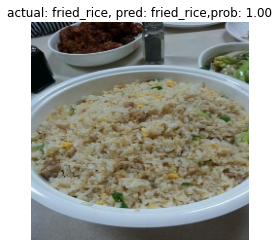

In [68]:
#CHeck out random image and its predictions
image_prediction(model_0,test_dir,class_names)